0.0 1.0
Saved compressed data to ../public/ct_slice_69_feet.json.gzip


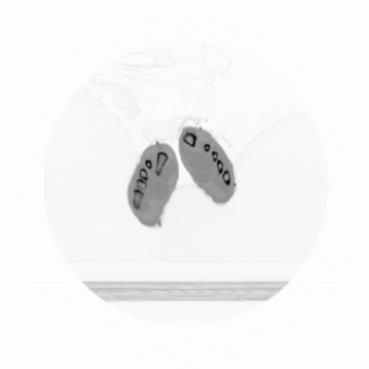

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import iradon, radon
import json
from json import JSONEncoder
from pathlib import Path
import gzip


class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} 

def show(img, cmap="gray"):
    plt.imshow(img, cmap)
    plt.axis("off")


name = "ct_slice_69_feet.png"

# name = "ct_slice_730_upper_legs.png"
# name = "ct_slice_1342_breast.png"
# name = "ct_slice_1542_teeth.png"

image_data = Image.open(name)
image_data = np.array(image_data.convert("RGBA"))
image = rgb2gray(1 - rgba2rgb(image_data))
print(image.min(), image.max())

theta = np.linspace(0.0 + 90, 180.0 + 90, max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
# plt.imshow(-iradon(sinogram, theta=theta, filter_name="shepp-logan"), cmap="gray")
# plt.axis("off")


imgs = []
for i in range(0, 20):
    fromangle = 18 * i
    toangle = 18 * i + 18
    thetaX = theta[fromangle:toangle]
    sinogramX = sinogram[:, fromangle:toangle]
    filtered_imX = iradon(sinogramX, theta=thetaX, filter_name="shepp-logan")
    filtered_imX_round = np.round(filtered_imX, 2)
    imgs.append(-filtered_imX_round)


img_final = imgs[0] * 0

for im in imgs:
    img_final += im

plt.imshow(img_final, cmap="gray")
plt.axis("off")



# prepare json

json_datastack = [im for im in imgs]
json_content = {"data": json_datastack}

# Path to the gzipped JSON file
path = f"../public/{name[:-4]}.json.gzip"

# Open the file in binary write mode and wrap it with a gzip writer
with gzip.open(path, 'wb') as jsonFile:
    # Dump the JSON data to a string and write it to the gzip writer
    json_str = json.dumps(json_content, indent=0, sort_keys=False, cls=NumpyArrayEncoder)
    jsonFile.write(json_str.encode('utf-8'))

# Print a message to show that the file was successfully saved
print(f"Saved compressed data to {path}")
